In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Logistic regression 

Here we investiagate how the logistic regression equation can be used to make a 'figtree' plot. This plot is generated by calling the equation may times and plotting to values that are converged to. For small values of R there is one convergence point. For larger values, there is a wide spread of values - the system goes choatic. 

In [3]:
def LM(r,x):
    
    return r*x*(1-x)

Two ways of making a Regular figtree plot

Text(0,0.5,'z')

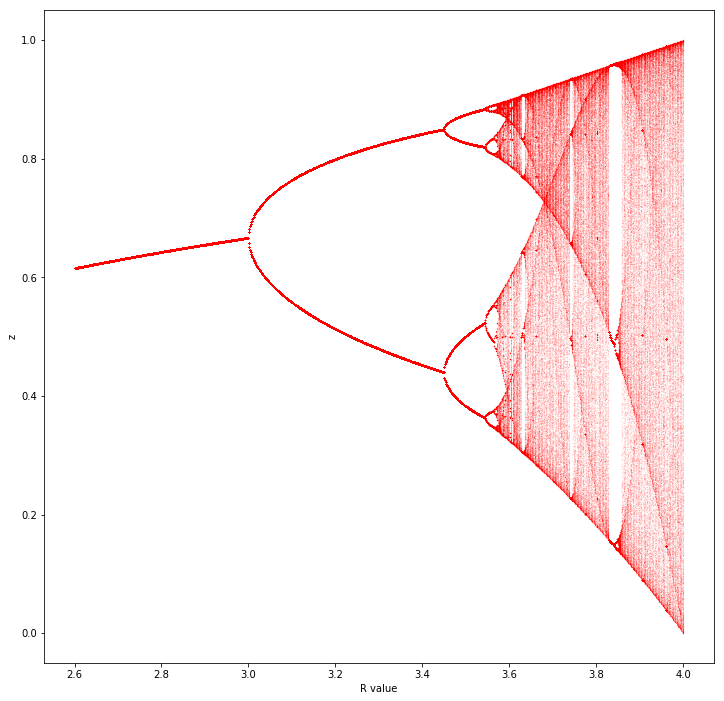

In [42]:
plt.figure(figsize=(12,12))

x0 = 0.49
n1 = 5000 #number of presteps
rspace = 1000
n2 = n1 + rspace
r = np.linspace(2.6,4.0,rspace)

#Alternative way using filling of matrix
A = np.zeros([rspace,rspace])
A_y_inc = 1.0/rspace

for i in range(rspace):
    
    r_val = r[i]
    z = np.zeros(n2-n1) #number of iterations to plot
    x = x0 #initial x value
    
    for j in range(n2):
        x = LM(r_val,x)
        
        #If converged, all these values will be the same
        if j >= n1:
            z[j-n1] = x
            
    #A_index = (z/A_y_inc).astype(int)
    #A[A_index,i] += 1
    
    #Fill matrix A with values in z
    for k in range(len(z)):
        A_index = (z[k]/A_y_inc).astype(int)
        A[A_index,i] += 1
        
    #For scaling in the image
    A[:,i] = np.tanh(A[:,i])
        
        #set some maximum value 
        #if A[A_index,i] >= 10:
        #    A[A_index,i]= 10
    
    
    
     
    x_dummy = 0.0*z+r_val #we want to plot all z values for given r_val
    plt.plot(x_dummy,z,'r.',markersize=0.05)

plt.xlabel('R value')
plt.ylabel('z')


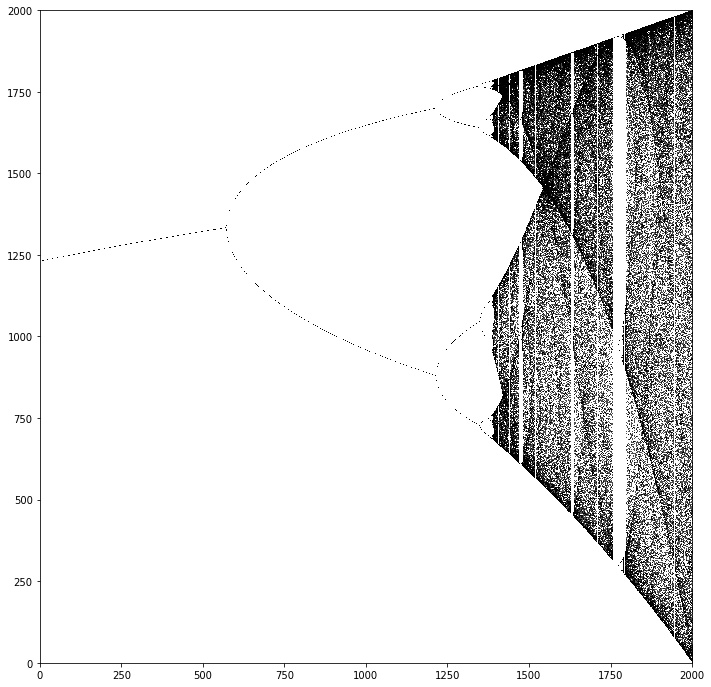

In [41]:
plt.figure(figsize=(12,12))
plt.imshow(A,cmap='Greys')
plt.gca().invert_yaxis()

CPU times: user 2.9 s, sys: 72.1 ms, total: 2.97 s
Wall time: 2.98 s


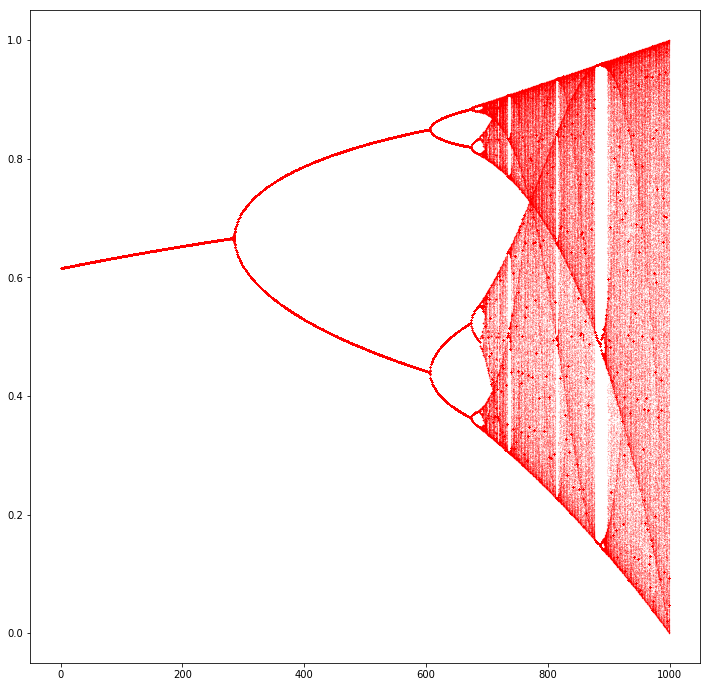

In [80]:
%%time
#Vectorized plot
fig = plt.figure(figsize=(12,12))
r = np.linspace(2.6,4.0,1000)
x = np.ones(len(r))*0.49

for i in range(n2):
    x = LM(r,x)    
    #If converged, all these values will be the same
    if i >= n1:
        z = x
    plt.plot(z,'r.',markersize=0.1)
  

Cob-webbing picture

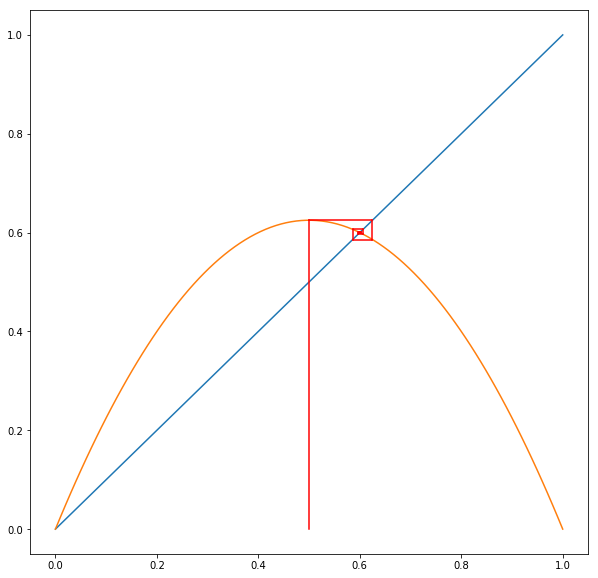

In [54]:
x = np.linspace(0,1,100)
r = [2.5,3.3,3.5,3.56,3.8,3.83]
r = [2.5]

plt.figure(figsize=(10,10))

x0 = 0.5

for r_val in r:
    plt.plot(x,x)
    plt.plot(x,LM(r_val,x))
    
    #plot first line 
    f0 = LM(r_val,x0)
    plt.plot([x0,x0],[0,f0],'r-')
    x_old = x0
    x_new = f0
    
    #iterate
    for i in range(100):
        #cross y
        plt.plot([x_old,x_new],[f0,f0],'r-')
        #cross x
        f1 = LM(r_val,x_new)
        plt.plot([x_new,x_new],[f0,f1],'r-')
        
        #update
        x_old = x_new
        x_new = f1
        f0 = f1
